The goal of this notebook is to examine if there is any difference in the distribution if sampling occurs before the filter is applied or the other way around....I am expecting a difference in the SD of the two distributions but I want to double check...

In [15]:
import numpy as np
import pandas as pd
from random import choices
import matplotlib.pyplot as plt

In [6]:
fullList = [x for x in range(10)]
partialList = [x for x in range(5)]

In [27]:
countsFullList = list()
countsPartialList = list()
pcFullList = list()
pcPartialList = list()
for i in range(1000000):
    sampleFull = choices(fullList, k=20000)
    samplePartial = choices(partialList, k=10000)
    sampleFull = [x for x in sampleFull if x<5]
    countsFull = len(list(filter(lambda x: x==2, sampleFull)))
    countsPartial = len(list(filter(lambda x: x==2, samplePartial)))
    countsFullList += [countsFull]
    countsPartialList += [countsPartial]
    pcFullList += [countsFull/len(sampleFull)]
    pcPartialList += [countsPartial/len(samplePartial)]
    

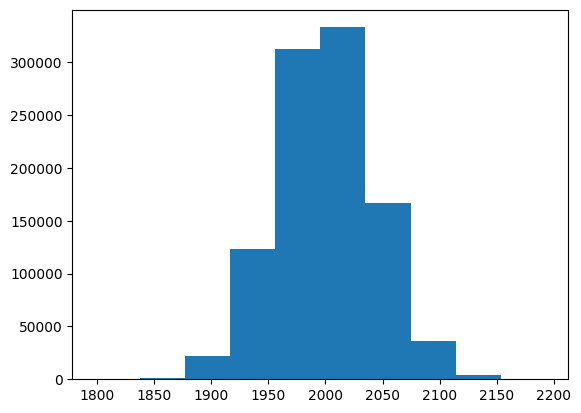

In [28]:
plt.hist(countsFullList, bins=10)
plt.show()

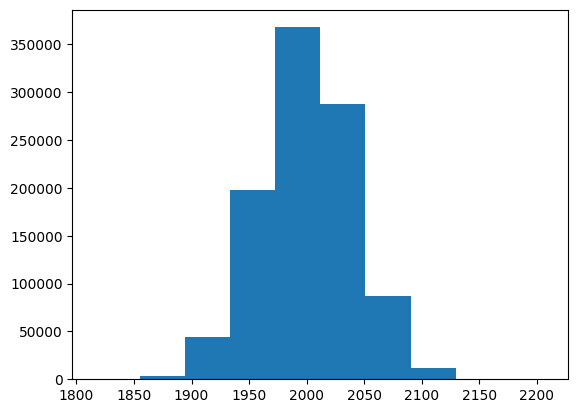

In [29]:
plt.hist(countsPartialList, bins=10)
plt.show()

In [34]:
#conclusion: there is a difference in the SD of the counts that originate from the 2 distributions

In [30]:
np.mean(countsFullList), np.std(countsFullList)

(1999.932696, 42.397514056505536)

In [31]:
np.mean(countsPartialList), np.std(countsPartialList)

(2000.033578, 39.98827918925638)

In [35]:
#conclusion: but there is no difference in the SD of percentages (or relative proportions) that originate from the 2 distributions

In [32]:
np.mean(pcFullList), np.std(pcFullList)

(0.19999428264172486, 0.0039972968636701875)

In [33]:
np.mean(pcPartialList), np.std(pcPartialList)

(0.20000335780000003, 0.0039988279189256395)

In [36]:
#so, I can implement the filter and sampling in a way that is best for efficiency...